In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path.append(os.path.join(os.getcwd(), ".."))
sys.path

import pandas as pd
import numpy as np
import os
import re

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! pip install seaborn==0.11.0

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [3]:
perturbation_processed_output_dir = os.path.join(os.getcwd(), "..", "..", "..", "..", "output/raw/coronaviridae_s_prot_perturbation/20240320/sars-cov-2/cov-S-aligned-multi-transfer_learning_mlm_fnn_2l_lr1e-4/processed")

human_label = "Human"
pred_diff_col = f"{human_label}_pred_diff"


In [4]:
def get_perturbation_output(perturbation_processed_output_dir):
    perturbation_output_files = os.listdir(perturbation_processed_output_dir)
    print(f"Number of perturbation output files = {len(perturbation_output_files)}")

    perturbed_output_dfs = []
    for perturbation_output_file in perturbation_output_files:
        df = pd.read_csv(os.path.join(perturbation_processed_output_dir, perturbation_output_file))
        orig_seq_df = df[df["orig_token"] == df["new_token"]]
        orig_pred_val = orig_seq_df[human_label].values[0]
        df[pred_diff_col] = df[human_label] - orig_pred_val
        df[f"abs_{pred_diff_col}"] = df[pred_diff_col].abs()
        perturbed_output_dfs.append(df)
    return pd.concat(perturbed_output_dfs)

In [5]:
perturbed_output_df = get_perturbation_output(perturbation_processed_output_dir)
print(f"perturbed_output_df shape = {perturbed_output_df.shape}")

Number of perturbation output files = 94
perturbed_output_df shape = (2978369, 15)



#### WIV04 reference sequence

In [6]:
wiv04_aligned_file_path = os.path.join(os.getcwd(), "..", "..", "..", "..", "input/data/coronaviridae/20240313/uniref/aligned/coronaviridae_s_uniref90_embl_hosts_pruned_metadata_corrected_species_virus_host_vertebrates_w_seq_t0.01_c8_aligned.csv")
wiv04_df = pd.read_csv(wiv04_aligned_file_path)
wiv04_df = wiv04_df[wiv04_df["uniref90_id"] == "WIV04"]
wiv04_df.head()

,uniref90_id,aligned_seq,seq,virus_name,virus_host_name,human_binary_label
0,WIV04,--------------MFVFLVLLPLVSS--------Q----------...,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,WIV04(MN996528.1) Wuhan variant index virus,homo sapiens,homo sapiens


In [7]:
wiv04_aligned_seq = wiv04_df["aligned_seq"].values[0]
wiv04_aligned_seq

'--------------MFVFLVLLPLVSS--------Q----------------CVN--------LTTRTQLPPAY----TNSFTRGVYYPDKVFRSSVLHSTQDLFLPF----------------FSNVTWFHAIHVSGT---------------NGTKRFDNPVLPFN-DGVYFASTEK---------SNIIRGWIFGTTLDSKTQSLLIVNNAT---------------------------N--------------------------VVIKVCEFQ----------------------FCNDPFLG-----VYYHKNNK------------SWMESEFRVY-----------------------------------------------------------------------------SSANNC--TFEYVSQPFLM------------DLEGKQG-NFKNLREFV------------------------------------------------------------------------------------------------------------------------------------------------------------------F-----------KNID-------------GYFKIYSKHTPIN--LVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIY------QTSNFRVQPTESIVRF----------------------------------------------------PNITNLCPFGEVFNATRF-ASVY--AWNRKRI----------SNCVADY--------------------------------------SVLYN----SASFST--------------------------------FKCYGVSP-------

In [8]:
wiv04_position_mapping = {}
pos = 0
for i, token in enumerate(wiv04_aligned_seq):
    if token == "-":
        continue
    else:
        pos += 1
        print(f"{pos}: {token}")
        wiv04_position_mapping[i] = int(pos)
        
perturbed_output_df["perturb_seq_pos"] = perturbed_output_df["perturb_pos"].apply(lambda x: int(wiv04_position_mapping[x]) if x in wiv04_position_mapping else None)        
perturbed_output_df["perturb_seq_pos"] = perturbed_output_df["perturb_seq_pos"].astype("Int64")

1: M
2: F
3: V
4: F
5: L
6: V
7: L
8: L
9: P
10: L
11: V
12: S
13: S
14: Q
15: C
16: V
17: N
18: L
19: T
20: T
21: R
22: T
23: Q
24: L
25: P
26: P
27: A
28: Y
29: T
30: N
31: S
32: F
33: T
34: R
35: G
36: V
37: Y
38: Y
39: P
40: D
41: K
42: V
43: F
44: R
45: S
46: S
47: V
48: L
49: H
50: S
51: T
52: Q
53: D
54: L
55: F
56: L
57: P
58: F
59: F
60: S
61: N
62: V
63: T
64: W
65: F
66: H
67: A
68: I
69: H
70: V
71: S
72: G
73: T
74: N
75: G
76: T
77: K
78: R
79: F
80: D
81: N
82: P
83: V
84: L
85: P
86: F
87: N
88: D
89: G
90: V
91: Y
92: F
93: A
94: S
95: T
96: E
97: K
98: S
99: N
100: I
101: I
102: R
103: G
104: W
105: I
106: F
107: G
108: T
109: T
110: L
111: D
112: S
113: K
114: T
115: Q
116: S
117: L
118: L
119: I
120: V
121: N
122: N
123: A
124: T
125: N
126: V
127: V
128: I
129: K
130: V
131: C
132: E
133: F
134: Q
135: F
136: C
137: N
138: D
139: P
140: F
141: L
142: G
143: V
144: Y
145: Y
146: H
147: K
148: N
149: N
150: K
151: S
152: W
153: M
154: E
155: S
156: E
157: F
158: R
15

In [9]:
perturbed_output_df[(perturbed_output_df["uniref90_id"] == "WIV04") & (perturbed_output_df["perturb_seq_pos"] == 614)]

,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,uniref90_id,y_true,orig_token,perturb_pos,new_token,Human_pred_diff,abs_Human_pred_diff,perturb_seq_pos
358,0.000075,0.000587,0.482725,0.001757,0.001058,0.114959,0.208681,0.190159,WIV04,Human,D,1595,N,0.0,0.0,614
504,0.000075,0.000587,0.482725,0.001757,0.001058,0.114959,0.208681,0.190159,WIV04,Human,D,1595,C,0.0,0.0,614
822,0.000075,0.000587,0.482725,0.001757,0.001058,0.114959,0.208681,0.190159,WIV04,Human,D,1595,J,0.0,0.0,614
984,0.000075,0.000587,0.482725,0.001757,0.001058,0.114959,0.208681,0.190159,WIV04,Human,D,1595,Y,0.0,0.0,614
3533,0.000075,0.000587,0.482725,0.001757,0.001058,0.114959,0.208681,0.190159,WIV04,Human,D,1595,P,0.0,0.0,614
4270,0.000075,0.000587,0.482725,0.001757,0.001058,0.114959,0.208681,0.190159,WIV04,Human,D,1595,O,0.0,0.0,614
7674,0.000075,0.000587,0.482725,0.001757,0.001058,0.114959,0.208681,0.190159,WIV04,Human,D,1595,K,0.0,0.0,614
9555,0.000075,0.000587,0.482725,0.001757,0.001058,0.114959,0.208681,0.190159,WIV04,Human,D,1595,U,0.0,0.0,614
11201,0.000075,0.000587,0.482725,0.001757,0.001058,0.114959,0.208681,0.190159,WIV04,Human,D,1595,Q,0.0,0.0,614
14522,0.000075,0.000587,0.482725,0.001757,0.001058,0.114959,0.208681,0.190159,WIV04,Human,D,1595,T,0.0,0.0,614


In [10]:
perturbed_output_df = perturbed_output_df[~perturbed_output_df["perturb_seq_pos"].isna()]

In [11]:
perturbed_output_df

,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,uniref90_id,y_true,orig_token,perturb_pos,new_token,Human_pred_diff,abs_Human_pred_diff,perturb_seq_pos
0,0.000213,0.004058,0.081635,0.001788,0.003794,0.005416,0.779555,0.123542,UniRef90_A0A8B1JBP8,Human,K,2234,Q,0.000000,0.000000,1149
1,0.000213,0.004058,0.081635,0.001788,0.003794,0.005416,0.779555,0.123542,UniRef90_A0A8B1JBP8,Human,F,2233,H,0.000000,0.000000,1148
2,0.000213,0.004058,0.081635,0.001788,0.003794,0.005416,0.779555,0.123542,UniRef90_A0A8B1JBP8,Human,E,2235,T,0.000000,0.000000,1150
3,0.000213,0.004058,0.081635,0.001788,0.003794,0.005416,0.779555,0.123542,UniRef90_A0A8B1JBP8,Human,E,1787,U,0.000000,0.000000,780
4,0.000281,0.004669,0.079043,0.002242,0.004940,0.005237,0.771312,0.132277,UniRef90_A0A8B1JBP8,Human,F,130,M,-0.008243,0.008243,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31521,0.004629,0.006263,0.015908,0.006993,0.003021,0.000424,0.866795,0.095968,UniRef90_A0A8B6RKY6,Human,S,1669,F,0.000000,0.000000,673
31522,0.004629,0.006263,0.015908,0.006993,0.003021,0.000424,0.866795,0.095968,UniRef90_A0A8B6RKY6,Human,K,2408,Z,0.000000,0.000000,1266
31523,0.003971,0.006221,0.015743,0.006036,0.002833,0.000422,0.876217,0.088556,UniRef90_A0A8B6RKY6,Human,A,896,Y,0.009422,0.009422,363
31524,0.004629,0.006263,0.015908,0.006993,0.003021,0.000424,0.866795,0.095968,UniRef90_A0A8B6RKY6,Human,V,1788,N,0.000000,0.000000,781


#### Distribution of Human class difference

<Figure size 432x288 with 0 Axes>

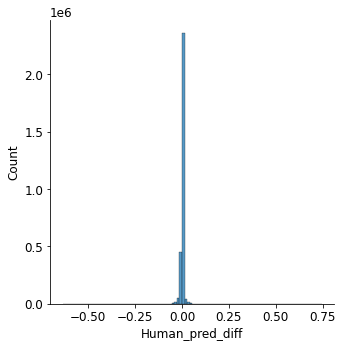

,start,end,count,percentage
0,-0.635250,-0.566258,5,0.000169
1,-0.566258,-0.497265,36,0.001219
2,-0.497265,-0.428273,86,0.002912
3,-0.428273,-0.359281,120,0.004064
4,-0.359281,-0.290288,177,0.005994
5,-0.290288,-0.221296,210,0.007112
6,-0.221296,-0.152304,404,0.013681
7,-0.152304,-0.083311,1944,0.065833
8,-0.083311,-0.014319,76120,2.577788
9,-0.014319,0.054673,2869572,97.177471


In [12]:
plt.clf()
#plt.rcParams['xtick.labelsize'] = 12
#plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["figure.figsize"] = 24, 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams.update({'font.size': 12})
sns.displot(perturbed_output_df["Human_pred_diff"], bins=100)
plt.show()

n_bins = 20
n = perturbed_output_df.shape[0]
freq, bins = np.histogram(perturbed_output_df[pred_diff_col], bins=n_bins)
hist_map = []
for i in range(n_bins):
    hist_map.append({"start": bins[i], "end":bins[i+1], "count": freq[i], "percentage": freq[i]/n*100})
    
hist_df = pd.DataFrame(hist_map)
hist_df.head(20)

In [13]:
selected_df = perturbed_output_df[perturbed_output_df[f"abs_{pred_diff_col}"] >= 0.1]
print(f"Number of sequences with abs_{pred_diff_col} >= 0.1: {selected_df.shape[0]} ({selected_df.shape[0]/perturbed_output_df.shape[0]*100})")

Number of sequences with abs_Human_pred_diff >= 0.1: 3139 (0.10630159513349334)


<Figure size 1728x864 with 0 Axes>

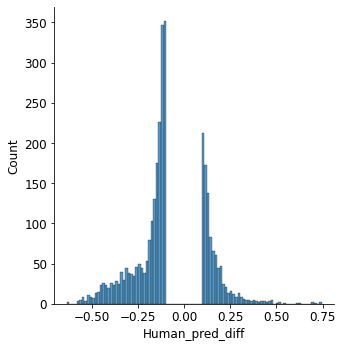

,start,end,count,percentage
0,-0.635250,-0.566258,5,0.000169
1,-0.566258,-0.497265,36,0.001219
2,-0.497265,-0.428273,86,0.002912
3,-0.428273,-0.359281,120,0.004064
4,-0.359281,-0.290288,177,0.005994
5,-0.290288,-0.221296,210,0.007112
6,-0.221296,-0.152304,404,0.013681
7,-0.152304,-0.083311,1100,0.037251
8,-0.083311,-0.014319,0,0.000000
9,-0.014319,0.054673,0,0.000000


In [14]:
plt.clf()
#plt.rcParams['xtick.labelsize'] = 12
#plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["figure.figsize"] = 36, 24
#plt.rcParams["xtick.labelsize"] = 12
#plt.rcParams["ytick.labelsize"] = 12
plt.rcParams.update({'font.size': 12})
sns.displot(selected_df["Human_pred_diff"], bins=100)
plt.show()

n_bins = 20
n = perturbed_output_df.shape[0]
freq, bins = np.histogram(selected_df[pred_diff_col], bins=n_bins)
hist_map = []
for i in range(n_bins):
    hist_map.append({"start": bins[i], "end":bins[i+1], "count": freq[i], "percentage": freq[i]/n*100})
    
hist_df = pd.DataFrame(hist_map)
hist_df.head(20)

### Known Mutations

In [15]:
s_mutations_file_path = os.path.join(os.getcwd(), "..", "..", "..", "..","input/data/coronaviridae/20240313/wiv04/s_mutations.csv")
s_mutations_df = pd.read_csv(s_mutations_file_path)
s_mutations_df["perturbation_id"] = s_mutations_df["orig_token"] + s_mutations_df["pos"].astype("str") + s_mutations_df["new_token"]
s_mutations_df.head(15)

,orig_token,pos,new_token,perturbation_id
0,D,614,G,D614G
1,S,943,P,S943P
2,E,484,K,E484K
3,N,501,Y,N501Y
4,L,452,R,L452R
5,Q,677,P,Q677P
6,Q,677,H,Q677H
7,P,681,H,P681H
8,E,484,Q,E484Q
9,K,417,N,K417N


In [16]:
perturbed_output_df["perturbation_id"] = perturbed_output_df.apply(lambda x: f"{x['orig_token']}{x['perturb_seq_pos']}{x['new_token']}", axis=1)
known_mutations_df = perturbed_output_df[perturbed_output_df["perturbation_id"].isin(s_mutations_df["perturbation_id"])]
known_mutations_df

,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,uniref90_id,y_true,orig_token,perturb_pos,new_token,Human_pred_diff,abs_Human_pred_diff,perturb_seq_pos,perturbation_id
8764,0.000213,0.004058,0.081635,0.001788,0.003794,0.005416,0.779555,0.123542,UniRef90_A0A8B1JBP8,Human,N,1399,Y,0.000000,0.000000,501,N501Y
8979,0.000210,0.004199,0.083298,0.001766,0.003963,0.005643,0.775784,0.125137,UniRef90_A0A8B1JBP8,Human,L,1243,R,-0.003771,0.003771,452,L452R
10138,0.000213,0.004282,0.076614,0.001703,0.003918,0.004942,0.792228,0.116101,UniRef90_A0A8B1JBP8,Human,S,1276,N,0.012674,0.012674,477,S477N
21915,0.000213,0.004058,0.081635,0.001788,0.003794,0.005416,0.779555,0.123542,UniRef90_A0A8B1JBP8,Human,S,2004,P,0.000000,0.000000,943,S943P
24205,0.000216,0.004125,0.082933,0.001825,0.003931,0.005560,0.774743,0.126667,UniRef90_A0A8B1JBP8,Human,S,1276,G,-0.004812,0.004812,477,S477G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17527,0.004689,0.006354,0.016217,0.007143,0.003128,0.000438,0.863578,0.098454,UniRef90_A0A8B6RKY6,Human,S,1276,G,-0.003217,0.003217,477,S477G
21238,0.004629,0.006263,0.015908,0.006993,0.003021,0.000424,0.866795,0.095968,UniRef90_A0A8B6RKY6,Human,N,1399,Y,0.000000,0.000000,501,N501Y
21309,0.004629,0.006263,0.015908,0.006993,0.003021,0.000424,0.866795,0.095968,UniRef90_A0A8B6RKY6,Human,Q,1673,H,0.000000,0.000000,677,Q677H
21366,0.004733,0.006586,0.014753,0.006718,0.003153,0.000385,0.873941,0.089730,UniRef90_A0A8B6RKY6,Human,S,1276,N,0.007146,0.007146,477,S477N


In [17]:
known_mutations_stats = known_mutations_df[["uniref90_id", "perturbation_id"]].groupby("perturbation_id").count().reset_index()
known_mutations_stats.rename(columns={"uniref90_id": "n_unique_sequences"}, inplace=True)
known_mutations_stats["percentage"] = known_mutations_stats["n_unique_sequences"] / 94 * 100
known_mutations_stats

,perturbation_id,n_unique_sequences,percentage
0,D614G,2,2.127660
1,E484K,83,88.297872
2,E484Q,83,88.297872
3,K417N,89,94.680851
4,K417T,89,94.680851
5,L452R,30,31.914894
6,N501Y,85,90.425532
7,P681H,91,96.808511
8,Q677H,88,93.617021
9,Q677P,88,93.617021


<Figure size 2592x1728 with 0 Axes>

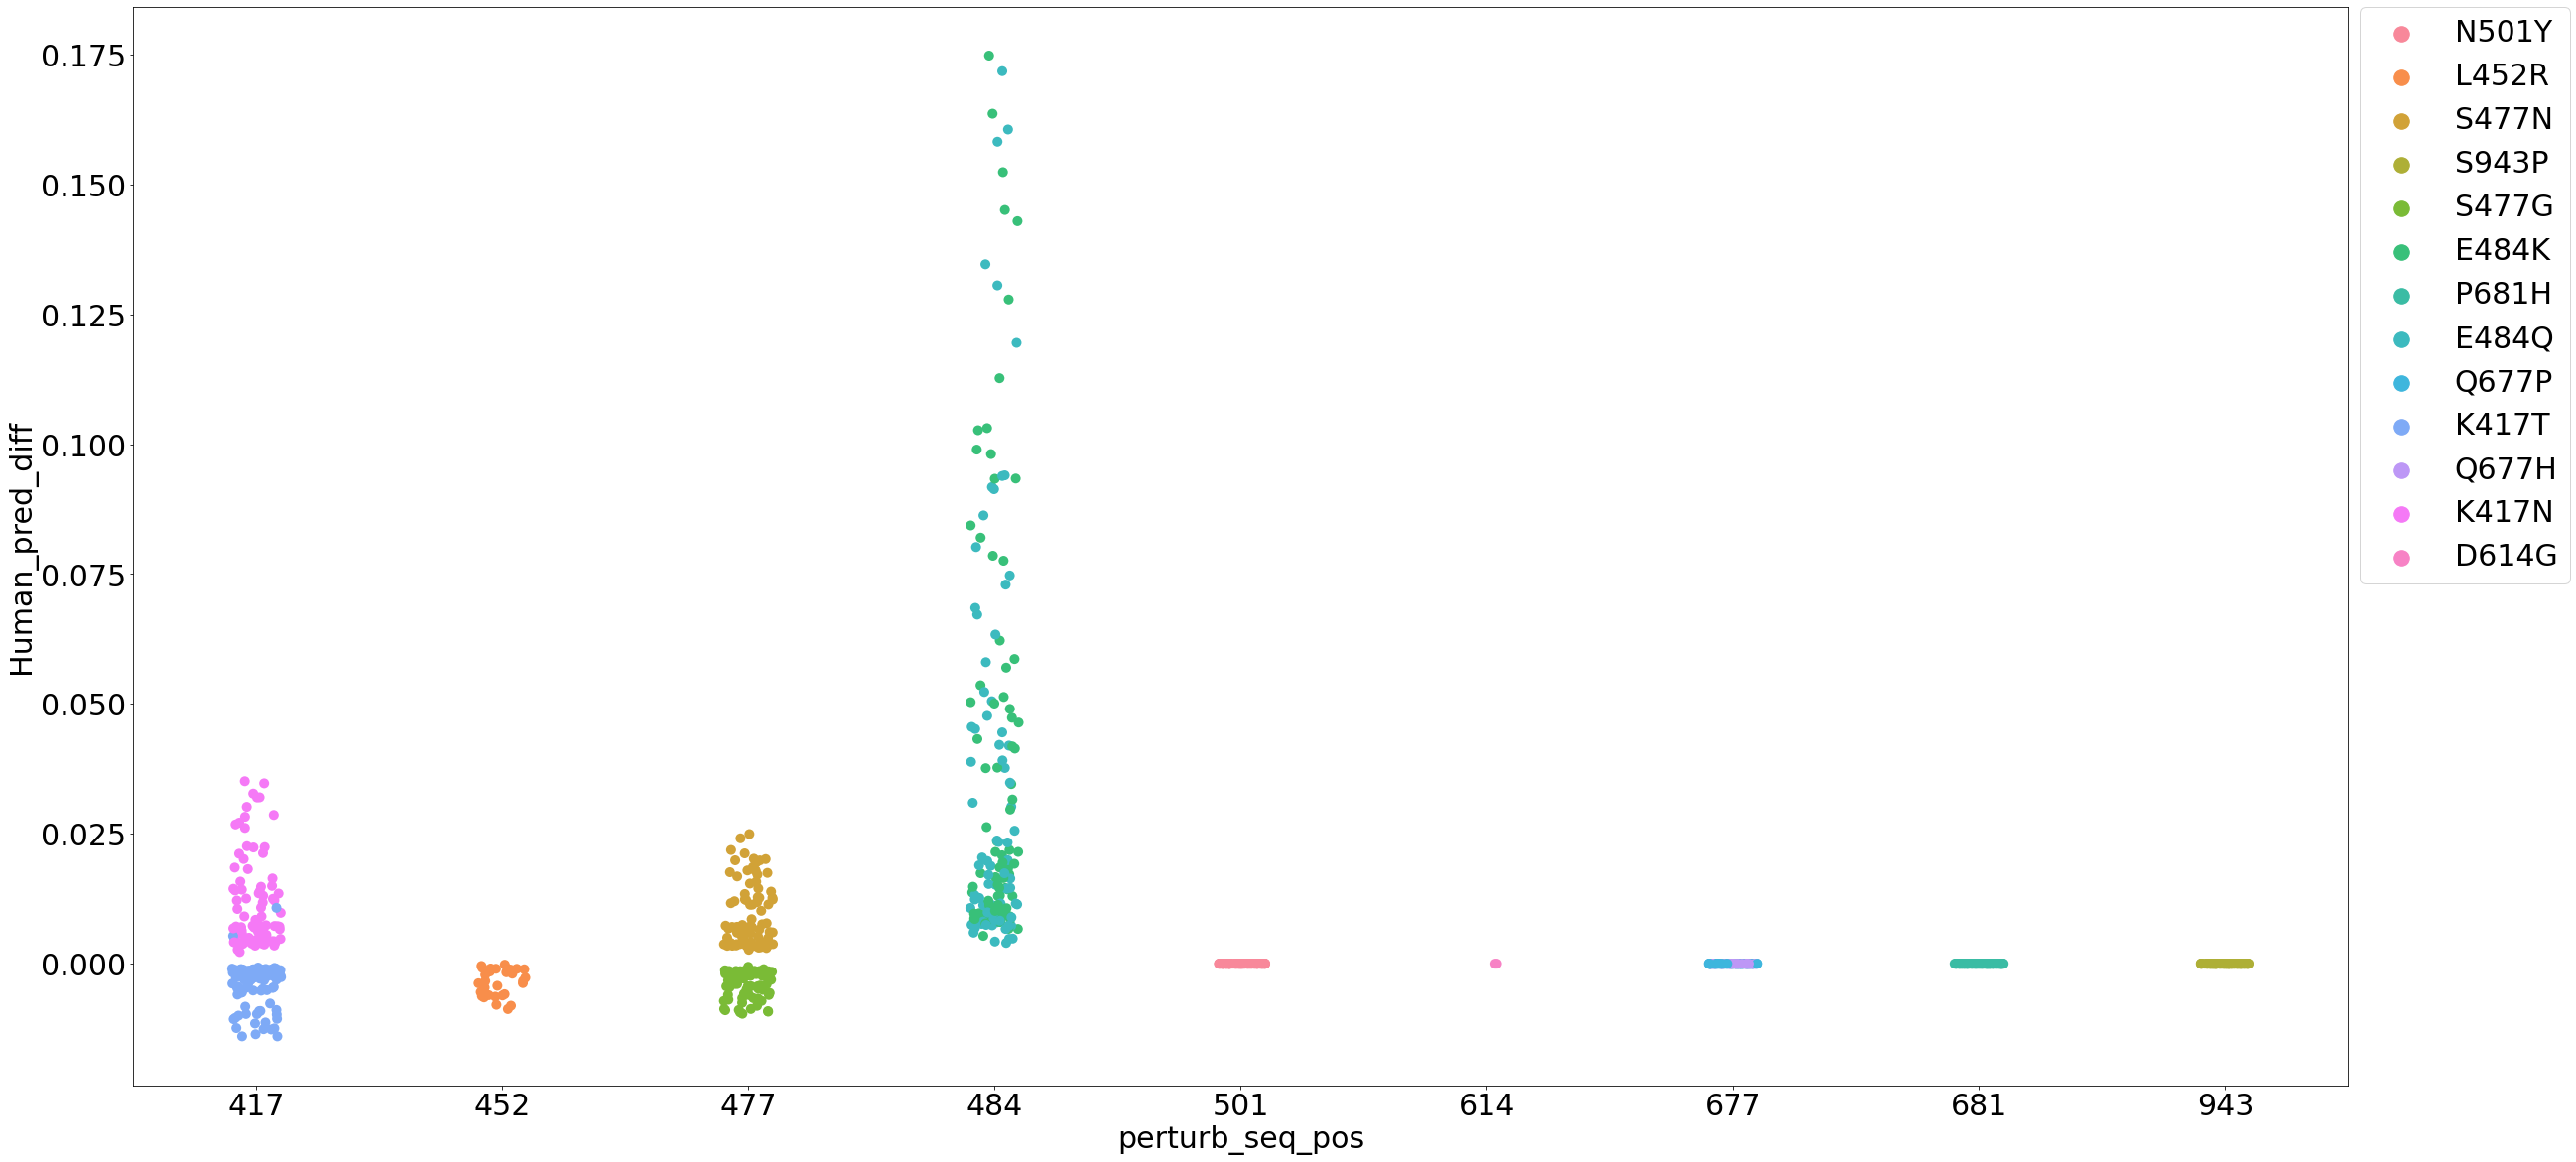

In [18]:
plt.clf()
plt.figure(figsize=(40, 20))
plt.rcParams.update({'font.size': 30})
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30

ax = sns.stripplot(data=known_mutations_df, x="perturb_seq_pos", y="Human_pred_diff", hue="perturbation_id", s=10)

x_mapping = {}
for i in ax.get_xticklabels():
    x_mapping[str(i.get_text())] = i.get_position()[0]

xytextcoords = [(-75, -75), (75, 75)]
# for _, row in known_mutations_df.iterrows():
#     if row["abs_Human_pred_diff"] > 0.01:
#         ax.annotate(text=row["perturbation_id"],
#                     xy=(x_mapping[str(row["perturb_seq_pos"])], row["Human_pred_diff"]), xycoords="data",
#                     xytext=xytextcoords[_ % 2], textcoords="offset points",
#                     arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
#                     bbox=dict(boxstyle="round", fc="w"))

plt.legend(bbox_to_anchor=(1.1, 1), borderaxespad=0, markerscale=2.)
#plt.xticks(rotation=90)

plt.show()

### Predicted important mutations

In [19]:
non_x_selected_df = selected_df[selected_df["new_token"] != "X"]
annotate_df_pos = non_x_selected_df.sort_values(by="Human_pred_diff", axis=0, ascending=False)[:5]
annotate_df_neg = non_x_selected_df.sort_values("Human_pred_diff", axis=0)[:5]
annotate_df = pd.concat([annotate_df_pos, annotate_df_neg])

<Figure size 2592x1728 with 0 Axes>

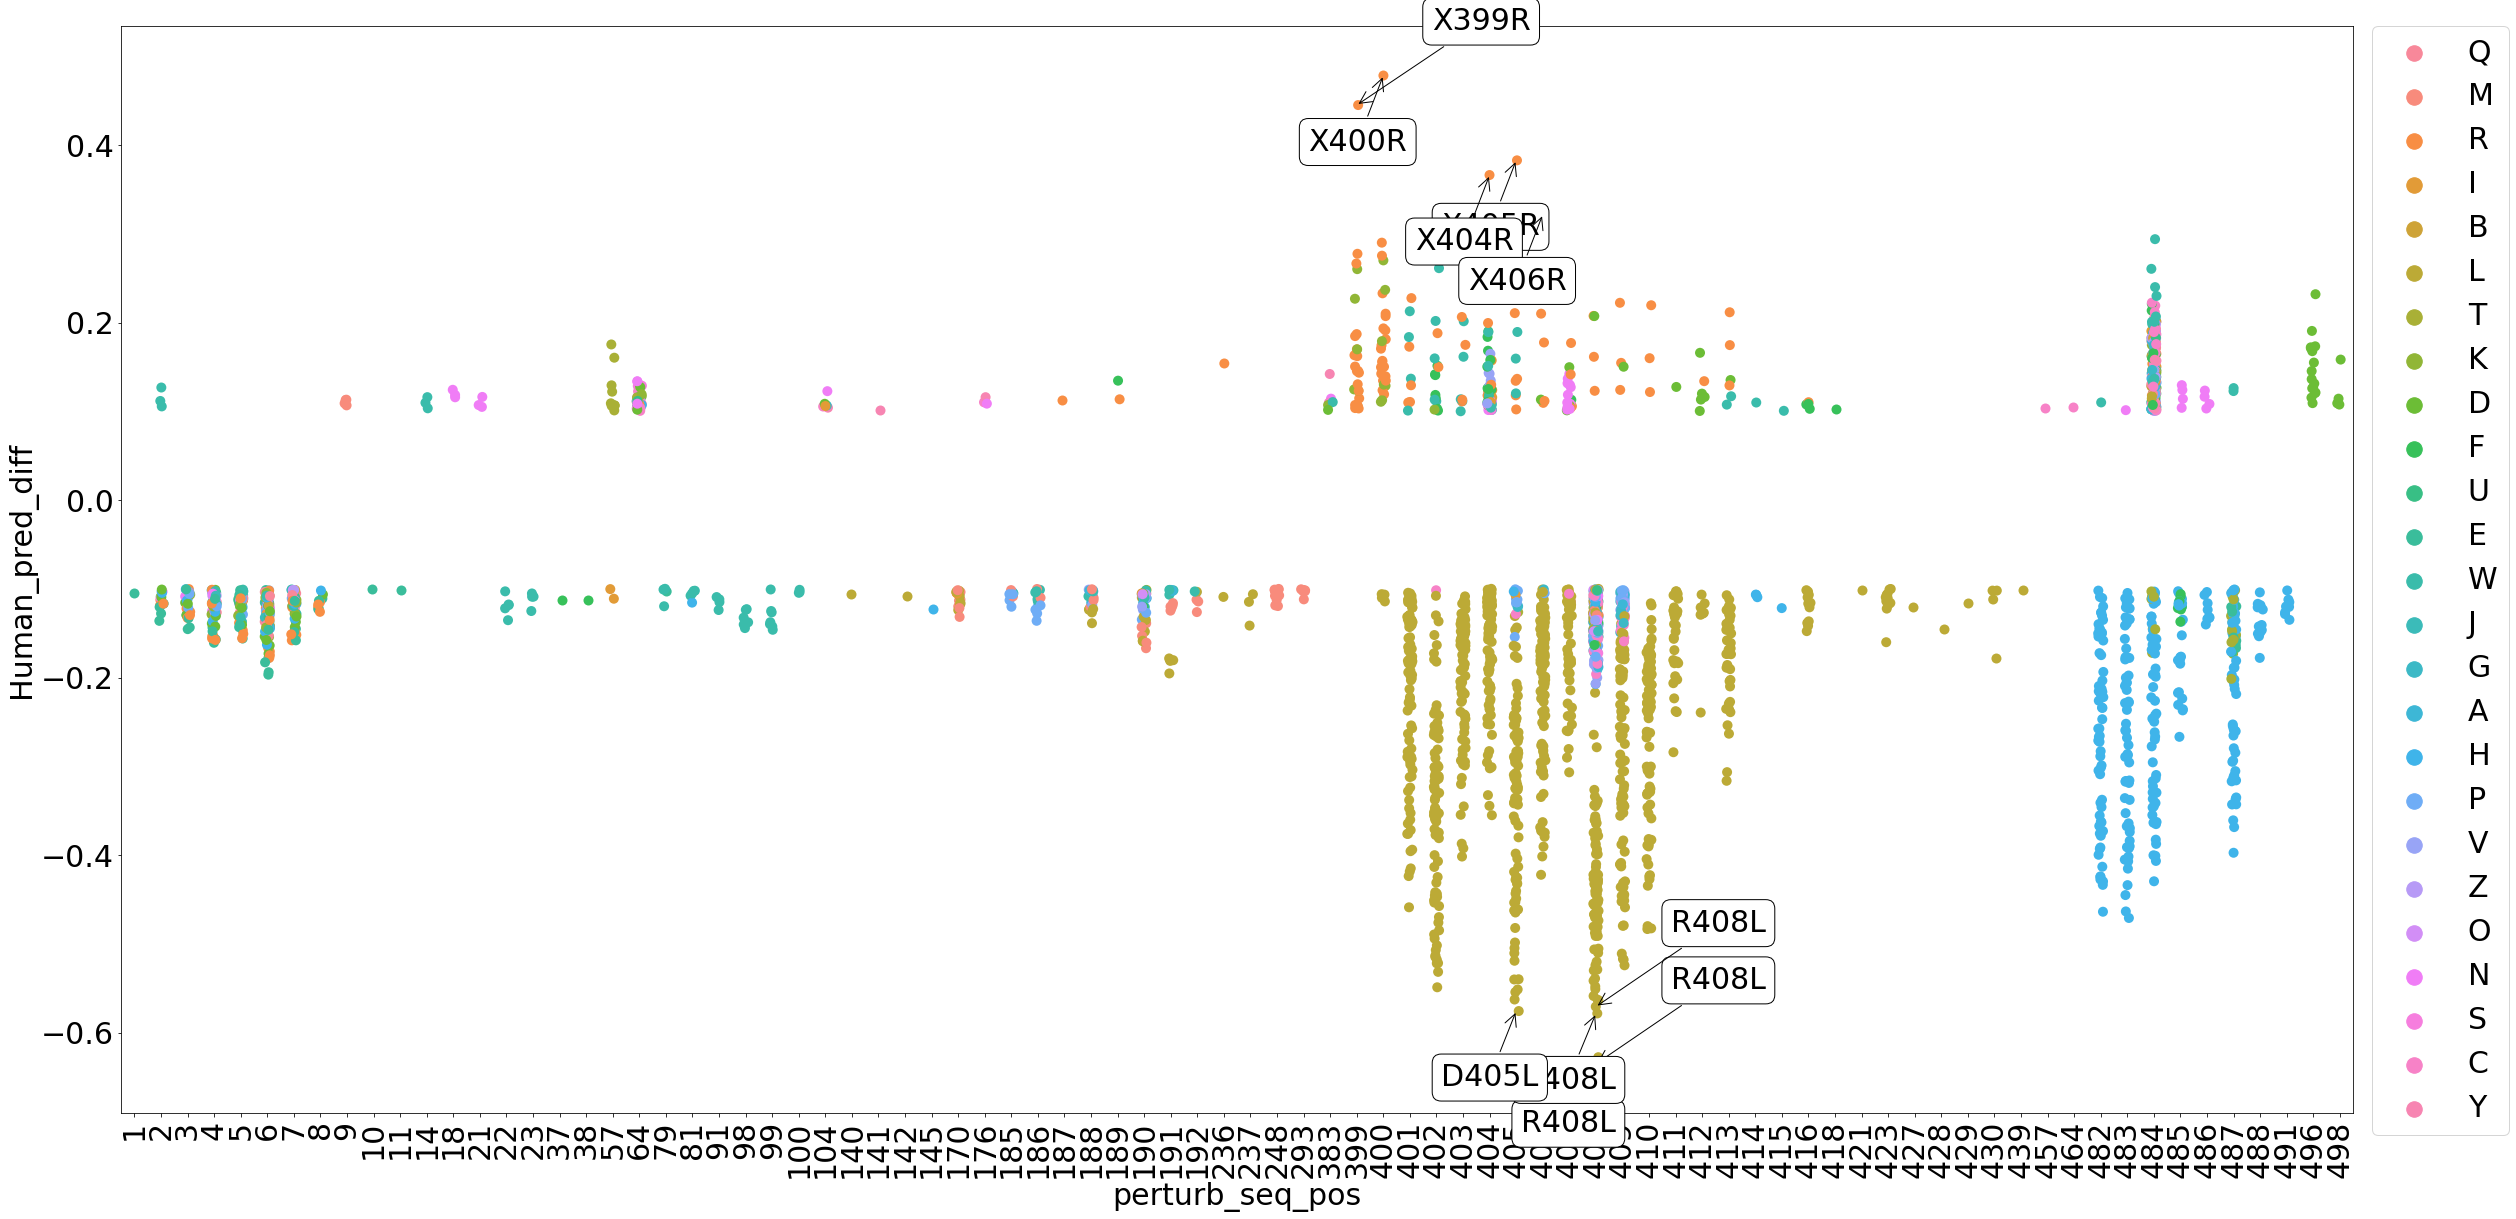

In [20]:
plt.clf()
plt.figure(figsize=(40, 20))
plt.rcParams.update({'font.size': 30})
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30

ax = sns.stripplot(data=non_x_selected_df, x="perturb_seq_pos", y="Human_pred_diff", hue="new_token", s=10)

x_mapping = {}
for i in ax.get_xticklabels():
    x_mapping[str(i.get_text())] = i.get_position()[0]

xytextcoords = [(-75, -75), (75, 75)]
for _, row in annotate_df.iterrows():
    ax.annotate(text=f"{row['orig_token']}{str(row['perturb_seq_pos'])}{row['new_token']}",
                xy=(x_mapping[str(row["perturb_seq_pos"])], row["Human_pred_diff"]), xycoords="data",
                xytext=xytextcoords[_ % 2], textcoords="offset points",
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
                bbox=dict(boxstyle="round", fc="w"))
    
plt.legend(bbox_to_anchor=(1.07, 1), borderaxespad=0, markerscale=2.)
plt.xticks(rotation=90)

plt.show()

In [21]:
mutation_mean_diff = perturbed_output_df[["perturbation_id", "Human_pred_diff"]].groupby("perturbation_id").mean("Human_pred_diff").rename(columns={"Human_pred_diff": "mean_Human_pred_diff"})
mutation_mean_diff.reset_index(inplace=True)
mutation_mean_diff.sort_values("mean_Human_pred_diff", ascending=True)

,perturbation_id,mean_Human_pred_diff
23594,R408L,-0.438029
11788,I402L,-0.356960
3885,D405L,-0.345715
22044,Q409L,-0.295267
11813,I410L,-0.263974
...,...,...
43272,X400K,0.164138
43379,X404R,0.180191
43404,X405R,0.188933
43229,X399R,0.234506


In [22]:
mutation_mean_diff[mutation_mean_diff["mean_Human_pred_diff"] == 0]

,perturbation_id,mean_Human_pred_diff
0,A1015B,0.0
1,A1015C,0.0
2,A1015D,0.0
3,A1015E,0.0
4,A1015F,0.0
...,...,...
55408,Y917U,0.0
55409,Y917V,0.0
55410,Y917W,0.0
55411,Y917X,0.0


In [23]:
mutation_mean_diff_selected = mutation_mean_diff[(mutation_mean_diff["mean_Human_pred_diff"] > 0.1) | (mutation_mean_diff["mean_Human_pred_diff"] < -0.1)].sort_values("mean_Human_pred_diff", ascending=True)
mutation_mean_diff_selected

,perturbation_id,mean_Human_pred_diff
23594,R408L,-0.438029
11788,I402L,-0.356960
3885,D405L,-0.345715
22044,Q409L,-0.295267
11813,I410L,-0.263974
9283,G482H,-0.216844
30623,V401L,-0.215730
43623,X413L,-0.214577
5510,E406L,-0.213175
30769,V483H,-0.210279


In [24]:
perturbed_output_df[perturbed_output_df["perturbation_id"].isin(mutation_mean_diff_selected["perturbation_id"])]

,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,uniref90_id,y_true,orig_token,perturb_pos,new_token,Human_pred_diff,abs_Human_pred_diff,perturb_seq_pos,perturbation_id
123,0.000377,0.004718,0.092867,0.003334,0.006327,0.007245,0.697861,0.187271,UniRef90_A0A8B1JBP8,Human,X,1077,L,-0.081694,0.081694,410,X410L
749,0.000151,0.004292,0.051254,0.000952,0.002566,0.002650,0.871518,0.066617,UniRef90_A0A8B1JBP8,Human,G,1301,X,0.091963,0.091963,485,G485X
3944,0.000755,0.006250,0.095210,0.006494,0.012986,0.009251,0.593693,0.275361,UniRef90_A0A8B1JBP8,Human,X,1087,L,-0.185862,0.185862,413,X413L
4678,0.000069,0.002430,0.057268,0.000531,0.001193,0.002853,0.885946,0.049708,UniRef90_A0A8B1JBP8,Human,X,1037,K,0.106391,0.106391,399,X399K
5225,0.000071,0.002442,0.060770,0.000563,0.001245,0.003121,0.878457,0.053330,UniRef90_A0A8B1JBP8,Human,X,1070,R,0.098902,0.098902,403,X403R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23474,0.025247,0.009928,0.023209,0.046769,0.014207,0.001014,0.579366,0.300261,UniRef90_A0A8B6RKY6,Human,G,1071,L,-0.287429,0.287429,404,G404L
24373,0.006286,0.005798,0.019302,0.011008,0.003708,0.000571,0.816054,0.137273,UniRef90_A0A8B6RKY6,Human,E,1300,H,-0.050741,0.050741,484,E484H
26102,0.002974,0.005905,0.010880,0.003688,0.002064,0.000245,0.918032,0.056213,UniRef90_A0A8B6RKY6,Human,V,1299,X,0.051237,0.051237,483,V483X
28769,0.007908,0.005871,0.020605,0.014281,0.004266,0.000637,0.788629,0.157804,UniRef90_A0A8B6RKY6,Human,G,1298,H,-0.078166,0.078166,482,G482H


<Figure size 2592x1728 with 0 Axes>

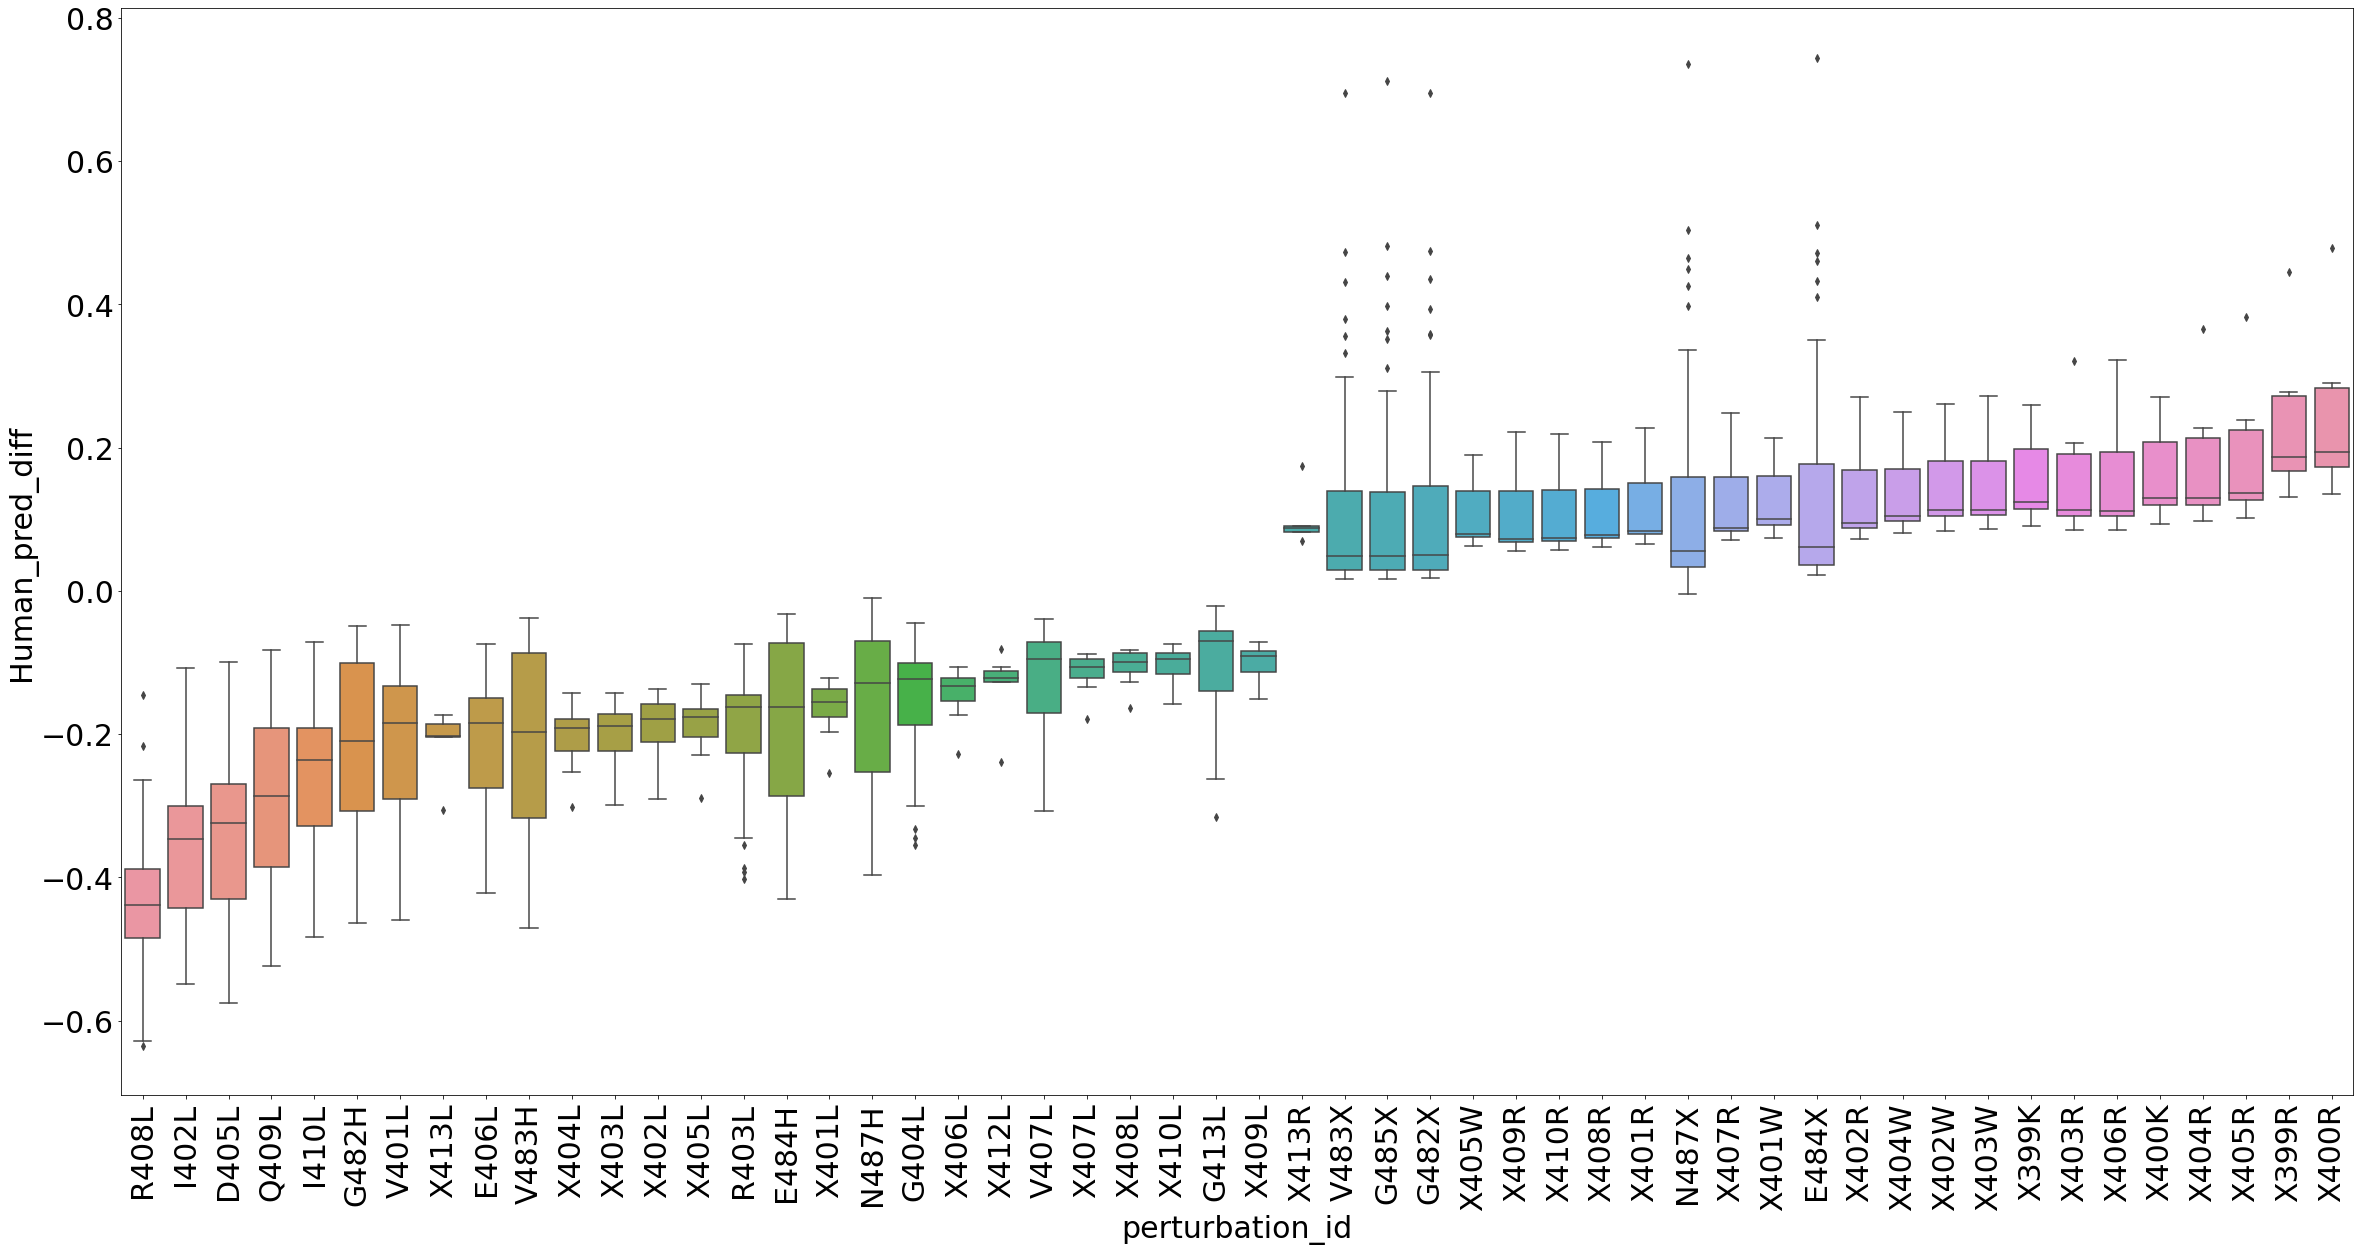

In [27]:
plt.clf()
plt.figure(figsize=(40, 20))
plt.rcParams.update({'font.size': 30})
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30

data = perturbed_output_df[perturbed_output_df["perturbation_id"].isin(mutation_mean_diff_selected["perturbation_id"])][["perturbation_id", "Human_pred_diff"]]
ax = sns.boxplot(data=data, y="Human_pred_diff", x="perturbation_id", order=mutation_mean_diff_selected["perturbation_id"])
plt.xticks(rotation=90)
plt.show()

In [28]:
perturbed_output_df[perturbed_output_df["perturb_seq_pos"] == 680]

,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,uniref90_id,y_true,orig_token,perturb_pos,new_token,Human_pred_diff,abs_Human_pred_diff,perturb_seq_pos,perturbation_id
557,0.000213,0.004058,0.081635,0.001788,0.003794,0.005416,0.779555,0.123542,UniRef90_A0A8B1JBP8,Human,S,1677,P,0.0,0.0,680,S680P
2123,0.000213,0.004058,0.081635,0.001788,0.003794,0.005416,0.779555,0.123542,UniRef90_A0A8B1JBP8,Human,S,1677,R,0.0,0.0,680,S680R
3009,0.000213,0.004058,0.081635,0.001788,0.003794,0.005416,0.779555,0.123542,UniRef90_A0A8B1JBP8,Human,S,1677,V,0.0,0.0,680,S680V
3082,0.000213,0.004058,0.081635,0.001788,0.003794,0.005416,0.779555,0.123542,UniRef90_A0A8B1JBP8,Human,S,1677,Y,0.0,0.0,680,S680Y
6408,0.000213,0.004058,0.081635,0.001788,0.003794,0.005416,0.779555,0.123542,UniRef90_A0A8B1JBP8,Human,S,1677,G,0.0,0.0,680,S680G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23531,0.004629,0.006263,0.015908,0.006993,0.003021,0.000424,0.866795,0.095968,UniRef90_A0A8B6RKY6,Human,S,1677,W,0.0,0.0,680,S680W
25419,0.004629,0.006263,0.015908,0.006993,0.003021,0.000424,0.866795,0.095968,UniRef90_A0A8B6RKY6,Human,S,1677,E,0.0,0.0,680,S680E
27647,0.004629,0.006263,0.015908,0.006993,0.003021,0.000424,0.866795,0.095968,UniRef90_A0A8B6RKY6,Human,S,1677,G,0.0,0.0,680,S680G
28666,0.004629,0.006263,0.015908,0.006993,0.003021,0.000424,0.866795,0.095968,UniRef90_A0A8B6RKY6,Human,S,1677,V,0.0,0.0,680,S680V
